In [1]:
import numpy as np
from mlcevaluator1 import mlcEvaluator1
from mlcevaluator2 import mlcEvaluator2
from mlctensor import mlcTensor
from sklearn.metrics import multilabel_confusion_matrix


## Syntetic example
Generate true and predicted labels

In [173]:
# Example GT and Prediction matrices
'''
gt=np.asarray([[1,1,0], [1,1,1], [0,0,0],
               [1,0,0], [1,1,0], [0,0,0],
               [1,0,0], [1,1,0], [1,1,0]])
              
pred=np.asarray([[1,1,0],[1,0,1],[0,0,0],
                 [1,1,1], [1,1,1], [0,1,1],
                 [0,1,1], [1,0,1], [0,0,1]])
'''

'''
gt=np.asarray([[1,1,0], [1,0,1], [0,0,1]])              
pred=np.asarray([[1,1,0],[1,0,1],[0,0,1]])
'''
gt=np.asarray([[1,1,1], [1,0,1], [0,0,1]])              
pred=np.asarray([[1,1,0],[1,0,1],[0,0,1]])

'''
# primjer2 - ocu negativan kappa - radi
gt=np.asarray([[1,1,0], [1,0,1], [0,0,1]])              
pred=np.asarray([[0,0,1],[1,1,1],[1,0,0]])
'''
'''
# primjer3 - ocu negativan kappa
gt=np.asarray([[1,1,0], [0,1,0], [0,0,1]])              
pred=np.asarray([[0,0,1],[1,0,0],[1,1,0]])
'''
'''
# Load GT and prediction from file
gt=np.load('data/posters/gt.npy')
pred=np.load('data/posters/pred_t09.npy')
'''

"\n# Load GT and prediction from file\ngt=np.load('data/posters/gt.npy')\npred=np.load('data/posters/pred_t09.npy')\n"

## Multi-label Confusion Tensor
Compute raw Multi-Label Confusion Tensor and normalized Recall and Precision Confusion matrices

In [174]:
evalT = mlcTensor(gt, pred)
MT = evalT.computeConfusionTensor(unique=True)
Rnorm = evalT.getRecall()
Pnorm = evalT.getPrecision()

In [175]:
PT.shape

(4, 4)

In [176]:
from utils import show_heatmap
labels=['C0', 'C1','C2', 'unkn.']

### Show Recall heatmap

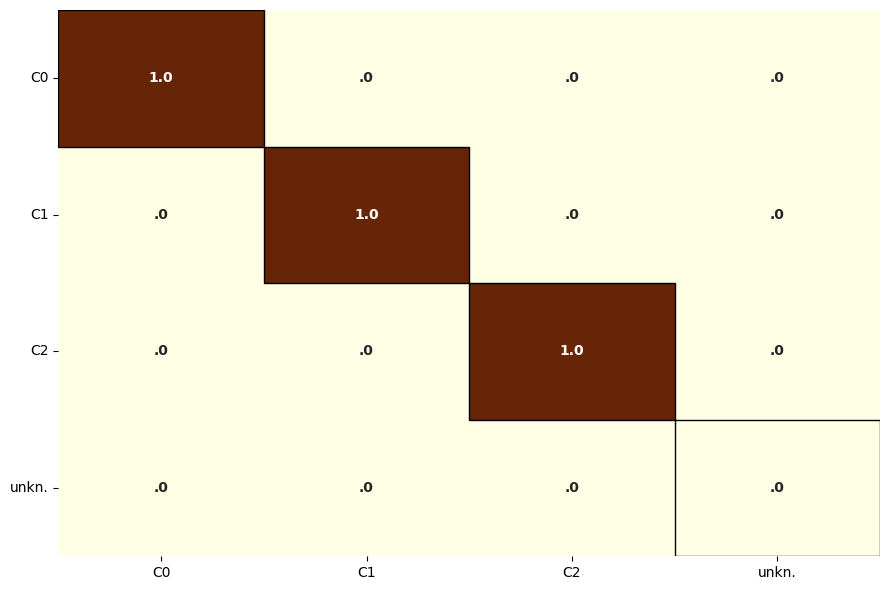

In [177]:
show_heatmap(Rnorm, labels=labels)

### Show Precision heatmap

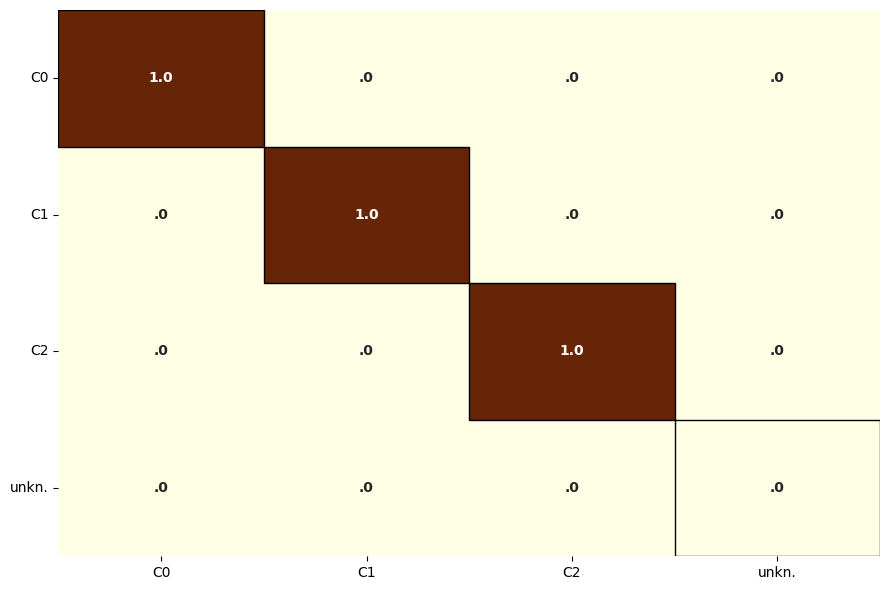

In [178]:
show_heatmap(Pnorm, labels=labels)

# Moram prominit da objasnim kappa
## Evaluating Classifier performance over all labels 
Let $\boldsymbol{T}_i$ be the vector representing the set of true labels for data instance $i$ and $\boldsymbol{P}_i$ be the vector of predicted labels for the same instance. Vectors $\boldsymbol{T}_{i1}=\boldsymbol{P}_{i1}=\boldsymbol{T}_i\cap \boldsymbol{P}_i$ represents correctly predicted labels. $\boldsymbol{T}_{i2}=\boldsymbol{T}_i\backslash \boldsymbol{P}_i$ is a set of true labels not predicted by the classifier, while $\boldsymbol{P}_{i2} = \boldsymbol{P}_i\backslash \boldsymbol{T}_i$ represents incorrectly predicted labels. It is clear that $\boldsymbol{T}_i = \boldsymbol{T}_{i1} + \boldsymbol{T}_{i1}$ and $\boldsymbol{P}_i = \boldsymbol{P}_{i1}+\boldsymbol{P}_{i2}$.<br>
 - $TP(k)$ (True Positive) stands for a number of instances with correctly assigned label $k$
 - $FP(k)$ (False Positive) stands for a number of instances with incorrectly assigned label $k$
 - $FN(k)$ (False Negative) represents the number of cases where the relevant label $k$ was not assigned to an instance. 

Let $B(TP(k) , FP(k) , TN(k), FN(k))$ be some specific binary classification metric, $k = 1, ...,q$, where $q$ is the number of possible labels.

Label-based classification metrics for a classificator can be obtained using either Macro-averaging or Micro-averaging approach.

### Macro-averaging
Macro-averaging averages over all  categories, thus giving each category equal weight<br>
$B_{Macro} = \frac{1}{q}\sum\limits_{k=1}^q B\big[ TP(k), FP(k), TN(k), FN(k)\big]$

Macro-averaged Recall and Precision for a classifier can be computed as:<br>
$R_{Macro} = \frac{1}{q}\sum\limits_{k=1}^q \frac{TP(k)}{TP(k)+FN(k)} = \frac{1}{q}\sum\limits_{k=1}^q R(k)$

$P_{Macro} = \frac{1}{q}\sum\limits_{k=1}^q \frac{TP(k)}{TP(k)+FP(k)} = \frac{1}{q}\sum\limits_{k=1}^q P(k)$,

where $R(k)$ and $P(k)$ are per-class Recall and Precision.

Compute P expected

In [179]:
MR = MT[0,:,:]
MP = MT[1,:,:]

#print(MR.sum())
Pe = 0
for k in range(MR.shape[0]):
    Pe += MR[k,:].sum() * MP[:,k].sum() / (MR.sum() * MP.sum())

print(Pe)
      
'''
print('Classifier Recall:', rClass)
print('Classifier Precision:', pClass)
'''

0.36


"\nprint('Classifier Recall:', rClass)\nprint('Classifier Precision:', pClass)\n"

Compute P observed

In [180]:
Po = MR.diagonal().sum()*MP.diagonal().sum()/(MR.sum()*MP.sum())
print(Po)

1.0


In [181]:
kappa = (Po - Pe)/(1-Pe)
print(kappa)

1.0
